In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns

Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: 1 for female and 2 for male.
\
age: of the patient.
\
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
\
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
\
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
\
pneumonia: whether the patient already have air sacs inflammation or not.
\
pregnancy: whether the patient is pregnant or not.
\
diabetes: whether the patient has diabetes or not.
\
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
\
asthma: whether the patient has asthma or not.
\
inmsupr: whether the patient is immunosuppressed or not.
\
hypertension: whether the patient has hypertension or not.
\
cardiovascular: whether the patient has heart or blood vessels related disease.
\
renal chronic: whether the patient has chronic renal disease or not.
\
other disease: whether the patient has other disease or not.
\
obesity: whether the patient is obese or not.
\
tobacco: whether the patient is a tobacco user.
\
usmr: Indicates whether the patient treated medical units of the first, second or third level.
\
medical unit: type of institution of the National Health System that provided the care.
\
intubed: whether the patient was connected to the ventilator.
\
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
\
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.
\



In [32]:
df = pd.read_csv('Covid Data.csv')

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [65]:
print("The size of the dataset unfiltered is:",len(df))

The size of the dataset unfiltered is: 1048575


In [33]:
# Create the 'died' column
df['died'] = (df['DATE_DIED'] != '9999-99-99').astype(int)
df = df.drop(labels='DATE_DIED',axis=1)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


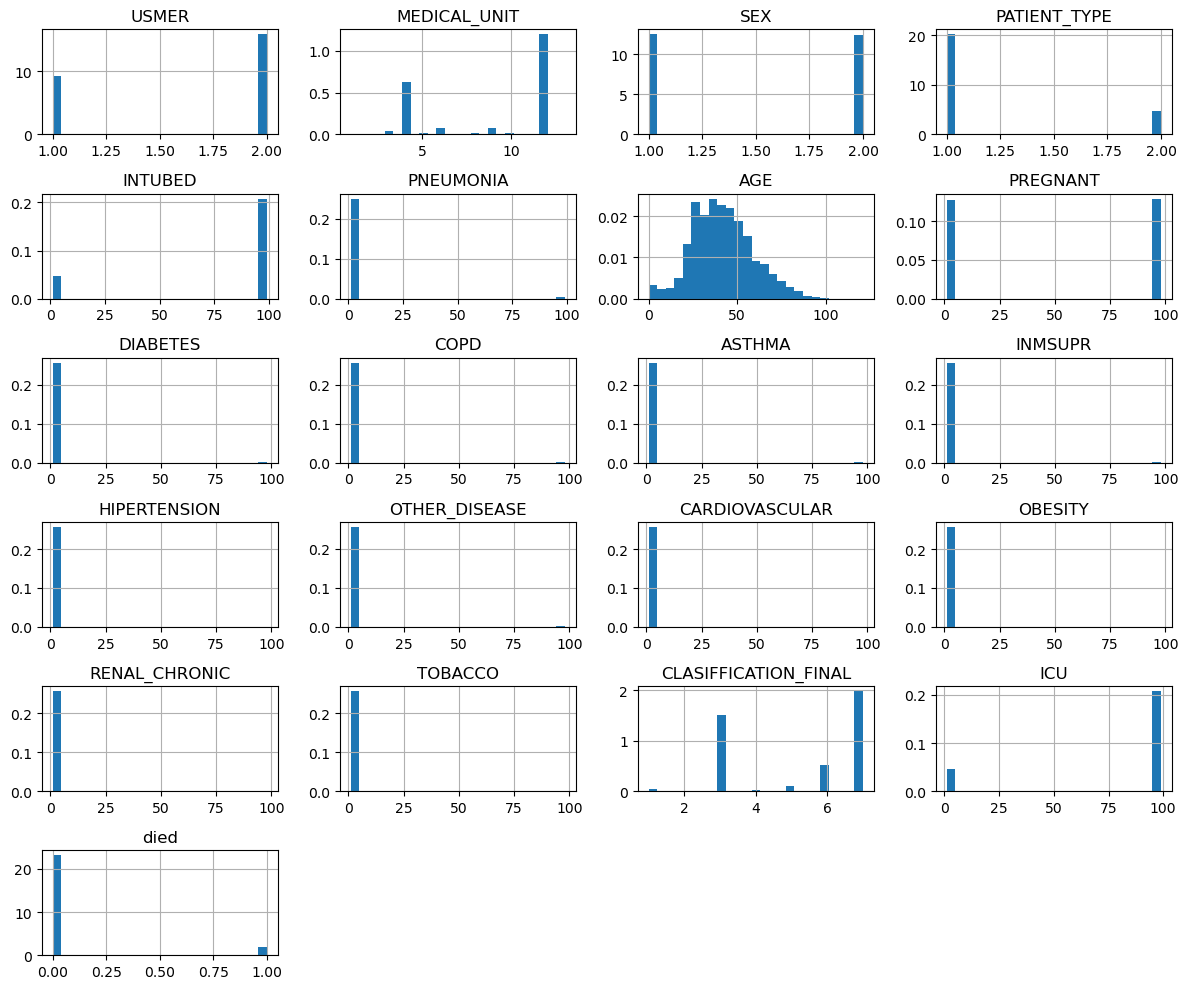

In [64]:
df.hist(density=True, bins=25, figsize=(12, 10), layout=(6, 4))
plt.tight_layout()
plt.show()

C:\Users\kmker\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\kmker\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kmker\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\kmker\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

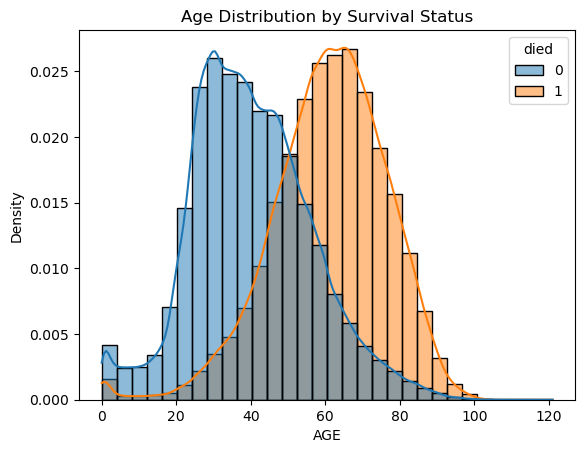

In [169]:
sns.histplot(data=df, x='AGE', hue='died', bins=30, kde=True, stat='density', common_norm=False)
plt.title('Age Distribution by Survival Status')
plt.show()

In [39]:
# all patients who went home will not have a value for icu or intubed 
patients = df[df['PATIENT_TYPE'] == 1]
icu = patients['ICU'].unique()
intubed = patients['INTUBED'].unique()

print("Unique values in ICU for returned home patients:", icu)
print("Unique values in INTUBED for returned home patients:", intubed)

Unique values in ICU for returned home patients: [97]
Unique values in INTUBED for returned home patients: [97]


In [59]:
for _ in df.columns:
    print("Unique values in:",_, df[_].unique()) 

Unique values in: USMER [2 1]
Unique values in: MEDICAL_UNIT [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in: SEX [1 2]
Unique values in: PATIENT_TYPE [1 2]
Unique values in: INTUBED [97  1  2 99]
Unique values in: PNEUMONIA [ 1  2 99]
Unique values in: AGE [ 65  72  55  53  68  40  64  37  25  38  24  30  48  23  80  61  54  59
  45  26  32  49  39  27  57  20  56  47  50  46  43  28  33  16  62  58
  36  44  66  52  51  35  19  90  34  22  29  14  31  42  15   1   0  17
  41   2  10  12  13   4   7   6   8  60   5  63  75  81  67  18  70  88
  85  92  73  74  78  76  82  77  86  71  95  87  83  84  79  69  89   3
  97  93 100  91  21 103  11   9  94  96 101 107 102  98  99 109 119 116
 105 104 111 114 120 106 108 110 118 117 121 115 113]
Unique values in: PREGNANT [ 2 97 98  1]
Unique values in: DIABETES [ 2  1 98]
Unique values in: COPD [ 2  1 98]
Unique values in: ASTHMA [ 2  1 98]
Unique values in: INMSUPR [ 2  1 98]
Unique values in: HIPERTENSION [ 1  2 98]
Unique value

Values of 97 in Intubed and ICU likely are due to the patient just going home, 99 is true missing data. Values of 98 in other cases seem to be considered missing as well. Pregnant should be dropped as a variable, likely not as relevant. 

In [63]:
print("The percentage of people who died in this dataset is:", 100*sum(df['died'] == 1)/len(df),"%")

The percentage of people who died in this dataset is: 7.337767923133777 %


In [36]:
df.corr() > 0.5

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died
USMER,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
MEDICAL_UNIT,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SEX,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
PATIENT_TYPE,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
INTUBED,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
PNEUMONIA,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AGE,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PREGNANT,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
DIABETES,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,False,False,False
COPD,False,False,False,False,False,False,False,False,True,True,...,True,True,True,True,True,True,True,False,False,False


Note: Pregnancy and sex high correlation. Probably becaause all men get a missing value for pregnancy. Intubated and ICU also have high correlation

## Filtering

We want to get rid of all obbservations with missing values. We will also be dropping the preganancy variable. 

In [72]:
df = df.drop('PREGNANT',axis=1)

In [78]:
#we dont want age to be caught in crossfire 
# we will remove all values of 98 and 99, treat as NaN
filter_list = [col for col in df.columns if col != 'AGE']

In [136]:
df_filtered = df[(df[filter_list] <= 97).all(axis=1)]

In [137]:
df_filtered

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,died
0,2,1,1,1,97,1,65,2,2,2,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,2,2,2,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,1,2,2,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,97,2,53,2,2,2,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,97,2,68,1,2,2,2,1,2,2,2,2,2,3,97,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,97,2,40,2,2,2,2,2,2,2,2,2,2,7,97,0
1048571,1,13,2,2,2,2,51,2,2,2,2,1,2,2,2,2,2,7,2,0
1048572,2,13,2,1,97,2,55,2,2,2,2,2,2,2,2,2,2,7,97,0
1048573,2,13,2,1,97,2,28,2,2,2,2,2,2,2,2,2,2,7,97,0


In [138]:
print("The size of the dataset post-filtering is:",len(df_filtered),"we lost:",len(df)-len(df_filtered),"observations" )

The size of the dataset post-filtering is: 1022839 we lost: 25736 observations


Now we want to adjust all the vlaues of 97 inthe ICU and INTUBATED variables to reflect a value of 2. Meaning they did not get sent to the ICU or were intubated. This is because all of these patients recieved a 1 for patient type, meaning they were returned home.

In [139]:
# Replace 97 with 2 in ICU and INTUBED 
df_filtered.loc[(df_filtered['ICU'] == 97), 'ICU'] = 2
df_filtered.loc[(df_filtered['INTUBED'] == 97), 'INTUBED'] = 2

In [140]:
for _ in df_filtered.columns:
    print("Unique values in:",_, df_filtered[_].unique()) 

Unique values in: USMER [2 1]
Unique values in: MEDICAL_UNIT [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Unique values in: SEX [1 2]
Unique values in: PATIENT_TYPE [1 2]
Unique values in: INTUBED [2 1]
Unique values in: PNEUMONIA [1 2]
Unique values in: AGE [ 65  72  55  53  68  40  64  37  25  38  24  30  48  23  80  61  54  59
  45  26  32  49  39  27  57  20  56  47  50  46  43  28  33  16  62  58
  36  44  66  52  51  35  19  90  34  22  29  14  31  42  15   0  17  41
   2  10   1  12   4   7   6   8  60   5  13  63  75  81  67  18  70  88
  85  92  73  74  78  76  82  77  86  71  95  87  83  84  79  69  89   3
  97  93 100  91  21 103  11   9  94  96 101 107 102  98  99 109 116 105
 111 104 114 120 106 110 118 117 121 108 115 119 113]
Unique values in: DIABETES [2 1]
Unique values in: COPD [2 1]
Unique values in: ASTHMA [2 1]
Unique values in: INMSUPR [2 1]
Unique values in: HIPERTENSION [1 2]
Unique values in: OTHER_DISEASE [2 1]
Unique values in: CARDIOVASCULAR [2 1]
Unique values 

This looks to be correct and ready for analysis.

In [161]:
print("The percentage of people who died in the filtered set is:", 100*sum(df_filtered['died'] == 1)/len(df_filtered),"%")

The percentage of people who died in the filtered set is: 7.172878625081758 %


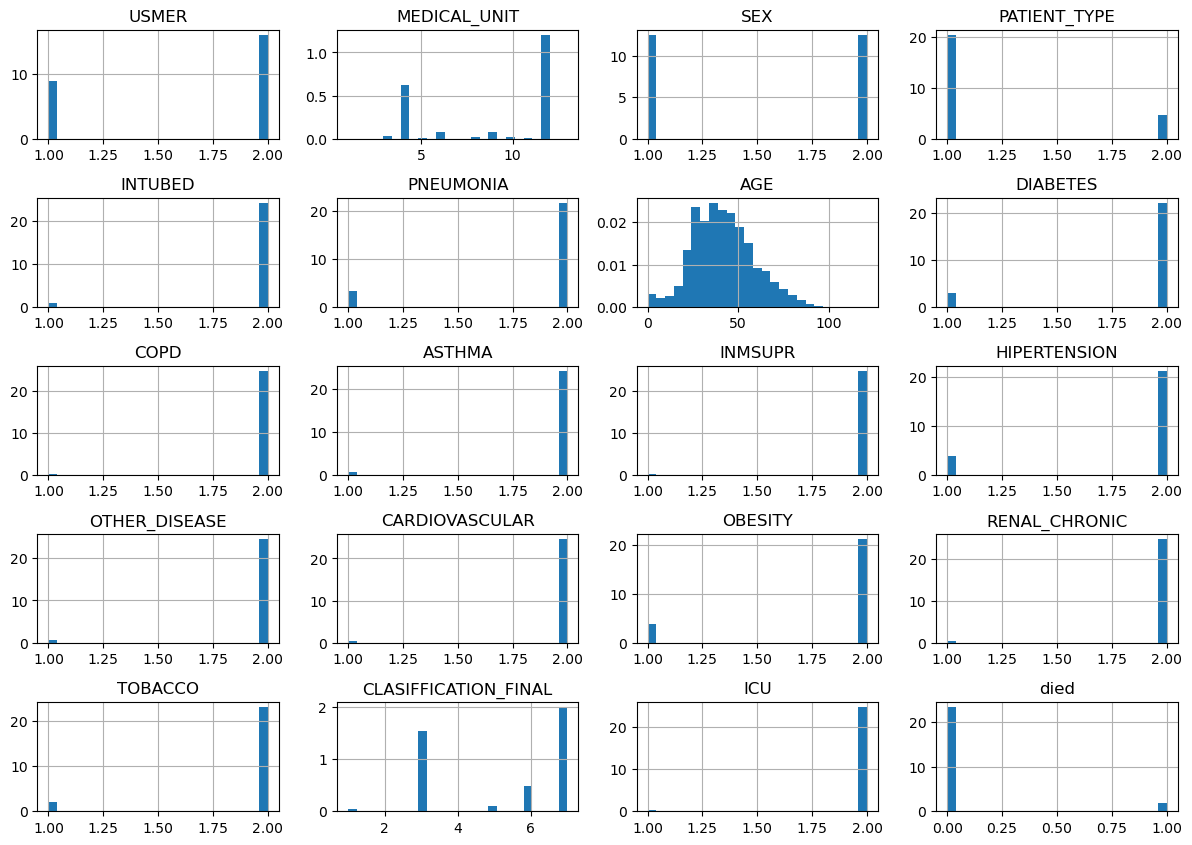

In [170]:
df_filtered.hist(density=True, bins=25, figsize=(12, 10), layout=(6, 4))
plt.tight_layout()
plt.show()

## Model Building

In [141]:
X = df_filtered[df_filtered.columns[df_filtered.columns!='died']]
y = df_filtered['died']

In [162]:
import statsmodels.api as sm 
smlog = sm.Logit(y,sm.add_constant(X)).fit()
smlog.summary2()

C:\Users\kmker\anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.538      
Dependent Variable:   died              AIC:               243924.3126
Date:                 2025-05-12 21:05  BIC:               244161.0745
No. Observations:     1022839           Log-Likelihood:    -1.2194e+05
Df Model:             19                LL-Null:           -2.6398e+05
Df Residuals:         1022819           LLR p-value:       0.0000     
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 0.6114   0.1488    4.1077 0.0000  0.3197  0.9031
USMER                -0.1699   0.0109  -15.6267 0.0000 -0.1912 -0.1486
MEDICAL_UNIT         -0.0722   0.0015  -47.1701 0.0000 -0.0752 -0.0692
SEX                   0.4022   0.0112   35.9153 0.0000  0.3802  0.4241
PATIENT_TYPE          2.2544   0.0164  137.8068 0.0000  2.2223  2.2864
INTUBED              -2.4194   0.0179 -135.0352 0.0000 -2.4545 -2.3843
PNEUMONIA            -1.0530   0.0125  -84.2570 0.0000 -1.0775 -1.0285
AGE                   0.0452   0.0004  123.3973 0.0000  0.0445  0.0459
DIABETES             -0.2875   0.0124  -23.2177 0.0000 -0.3118 -0.2633
COPD                  0.0350   0.0265    1.3188 0.1872 -0.0170  0.0870
ASTHMA                0.2348   0.0371    6.3215 0.0000  0.1620  0.3076
INMSUPR              -0.3067   0.0317   -9.6751 0.0000 -0.3688 -0.2446
HIPERTENSION         -0.0710   0.0126   -5.6441 0.0000 -0.0956 -0.0463
OTHER_DISEASE        -0.2772   0.0244  -11.3642 0.0000 -0.3251 -0.2294
CARDIOVASCULAR        0.1118   0.0252    4.4398 0.0000  0.0624  0.1611
OBESITY              -0.1678   0.0133  -12.6006 0.0000 -0.1939 -0.1417
RENAL_CHRONIC        -0.4967   0.0233  -21.3300 0.0000 -0.5424 -0.4511
TOBACCO               0.1453   0.0196    7.4004 0.0000  0.1068  0.1838
CLASIFFICATION_FINAL -0.2339   0.0030  -78.0725 0.0000 -0.2397 -0.2280
ICU                   0.3403   0.0233   14.5925 0.0000  0.2946  0.3860
======================================================================

"""

In [158]:
from sklearn.metrics import accuracy_score
y_pred_prob = smlog.predict(sm.add_constant(X))  # probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # convert to binary

print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.9494964505655338


In [144]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
from sklearn.linear_model import LogisticRegression

In [146]:
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_train,y_train)

In [147]:
clf.score(X_test,y_test)

0.9496548824840639

In [148]:
clf.coef_

array([[-0.16366216, -0.07076325,  0.3987738 ,  2.29847547, -2.4051691 ,
        -1.04912086,  0.04578861, -0.28515793,  0.0858965 ,  0.22460026,
        -0.19470761, -0.04776908, -0.26276606,  0.13454446, -0.17688391,
        -0.51342912,  0.14726002, -0.23284622,  0.3546013 ]])

In [149]:
clf.n_iter_

array([82])

In [150]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 19


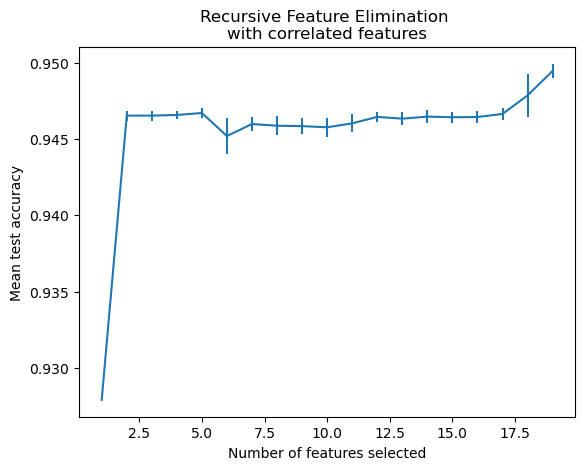

In [151]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [152]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor

XX=df_filtered[df_filtered.columns[df_filtered.columns!='died']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = XX.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(XX.values, i)
                          for i in range(len(XX.columns))]

print(vif_data)


                 feature         VIF
0                  USMER   13.257716
1           MEDICAL_UNIT    7.389832
2                    SEX   10.208151
3           PATIENT_TYPE   17.835346
4                INTUBED  158.610804
5              PNEUMONIA   55.326252
6                    AGE    9.420148
7               DIABETES   43.660171
8                   COPD  262.705491
9                 ASTHMA  128.627572
10               INMSUPR  277.725771
11          HIPERTENSION   36.218265
12         OTHER_DISEASE  150.393636
13        CARDIOVASCULAR  201.965861
14               OBESITY   28.506722
15         RENAL_CHRONIC  221.130866
16               TOBACCO   50.896094
17  CLASIFFICATION_FINAL    9.364362
18                   ICU  269.237453


## Modifications

We do forward selection and see if we can retain the accuracy with fewer features.

In [172]:
X = df_filtered.drop(columns=['died'])
y = df_filtered['died']

# Split the data (optional but good for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000)

# Perform forward selection
sfs = SFS(model,
          k_features=5,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5,  # 5-fold cross-validation
          n_jobs=-1)

sfs = sfs.fit(X_train, y_train)
print("Selected features:", list(sfs.k_feature_names_))

# Optional: create a summary dataframe
sfs_results = pd.DataFrame.from_dict(sfs.get_metric_dict()).T


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  19 | elapsed:   12.7s remaining:   17.5s
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   15.8s finished

[2025-05-12 21:59:31] Features: 1/5 -- score: 0.9465274947362599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:   12.9s remaining:   20.4s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   17.5s finished

[2025-05-12 21:59:49] Features: 2/5 -- score: 0.9465274947362599[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  17 | elapsed:   17.0s remaining:   55.4s
[Parallel(n_jobs=-1)]: Done  13 out of  17 | elapsed:   19.6s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:   22.5s finished

[2025-05-12 22:00:12] Features: 3/5 -- score: 0.9465274947362599[Parallel(n_jobs=-1)]: Using backend 

Selected features: ['USMER', 'MEDICAL_UNIT', 'INTUBED', 'INMSUPR', 'ICU']


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   50.4s finished

[2025-05-12 22:01:35] Features: 5/5 -- score: 0.9465287168267679

In [176]:
df_new = df_filtered[['USMER', 'MEDICAL_UNIT', 'INTUBED', 'INMSUPR', 'ICU','died']]

In [187]:
X = df_new[df_new.columns[df_new.columns!='died']]
y = df_new['died']

smlog = sm.Logit(y,sm.add_constant(X)).fit()

y_pred_prob = smlog.predict(sm.add_constant(X))  # probabilities
y_pred = (y_pred_prob >= 0.5).astype(int)  # convert to binary

Optimization terminated successfully.
         Current function value: 0.192322
         Iterations 8


In [189]:
smlog.summary2()

C:\Users\kmker\anaconda3\lib\site-packages\statsmodels\iolib\summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.255      
Dependent Variable: died             AIC:              393440.6018
Date:               2025-05-12 22:10 BIC:              393511.6304
No. Observations:   1022839          Log-Likelihood:   -1.9671e+05
Df Model:           5                LL-Null:          -2.6398e+05
Df Residuals:       1022833          LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const            10.1067   0.0740  136.5350 0.0000  9.9616 10.2518
USMER            -0.6970   0.0091  -76.9762 0.0000 -0.7148 -0.6793
MEDICAL_UNIT     -0.1331   0.0012 -110.2580 0.0000 -0.1354 -0.1307
INTUBED          -3.9351   0.0159 -247.8765 0.0000 -3.9663 -3.9040
INMSUPR          -0.8513   0.0277  -30.7109 0.0000 -0.9056 -0.7970
ICU              -0.6889   0.0253  -27.2458 0.0000 -0.7384 -0.6393
==================================================================

"""

In [190]:
print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 0.9466895572030398
